<a href="https://colab.research.google.com/github/OkktaDan/CCMACLRL_EXERCISES_COM231/blob/main/Exercise_1/Octaviano_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [181]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [182]:
df = pd.read_excel('Data.xlsx')

Display the first 5 rows of the dataset using `.head()`

In [183]:
df.head(5)

,Name,Post/Share Frequently,Active?,Replies to comments/posts,# of Friends/Followers,Personality
0,Luis,1,1,0,78,1
1,Emil,0,1,0,3200,1
2,Lovely,0,1,1,357,0
3,Lawrence,0,1,1,568,0
4,Danfred,1,1,1,227,0


Display the summary of all the features of the dataset using `.info()`

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Name                       100 non-null    object
 1   Post/Share Frequently      100 non-null    int64 
 2   Active?                    100 non-null    int64 
 3   Replies to comments/posts  100 non-null    int64 
 4   # of Friends/Followers     100 non-null    int64 
 5   Personality                100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


Display the total number of samples from each label using `.value_counts()`

In [185]:
df["Personality"].value_counts()

,count
Personality,
1,57
0,43


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

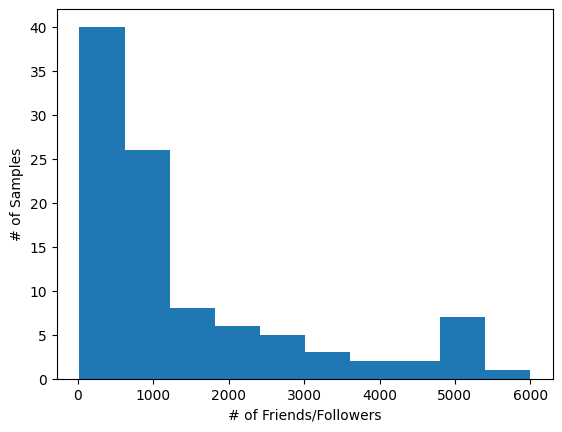

In [186]:
plt.hist(df["# of Friends/Followers"])
plt.xlabel("# of Friends/Followers")
plt.ylabel("# of Samples")
plt.show()

Remove the name column using `drop()` method

In [187]:
df.drop(columns="Name", inplace=True)

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [188]:
x = df.drop(columns="Personality").values
x

array([[   1,    1,    0,   78],
       [   0,    1,    0, 3200],
       [   0,    1,    1,  357],
       [   0,    1,    1,  568],
       [   1,    1,    1,  227],
       [   0,    0,    0,  110],
       [   0,    1,    0,  871],
       [   0,    1,    0,  855],
       [   2,    1,    0,  814],
       [   4,    1,    3,  188],
       [   0,    1,    0,  831],
       [   0,    1,    0,  197],
       [   5,    1,    3,  637],
       [  20,    1,    3,  335],
       [   1,    1,    2,  928],
       [   0,    0,    0, 1200],
       [   0,    0,    0,  775],
       [   4,    1,    4,  114],
       [   0,    0,    0,  457],
       [   2,    0,    0,  953],
       [   4,    1,    0, 2700],
       [   2,    1,    0, 5400],
       [   1,    1,    0,  202],
       [   0,    1,    0,  369],
       [   0,    1,    0,  679],
       [   3,    1,    2, 4900],
       [   0,    1,    0,  239],
       [   0,    0,    0,  430],
       [   1,    1,    1, 4900],
       [   1,    1,    1,  335],
       [  

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [189]:
y = df["Personality"].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [190]:
X_train, X_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9  )

Display the dimensions of each variables using `.shape()`

In [191]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 4)
(80,)
(20, 4)
(20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [192]:
knn = KNeighborsClassifier(n_neighbors=5)

Train the model using the `.fit()`

In [193]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Test the model using the `.predict()`

In [194]:
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

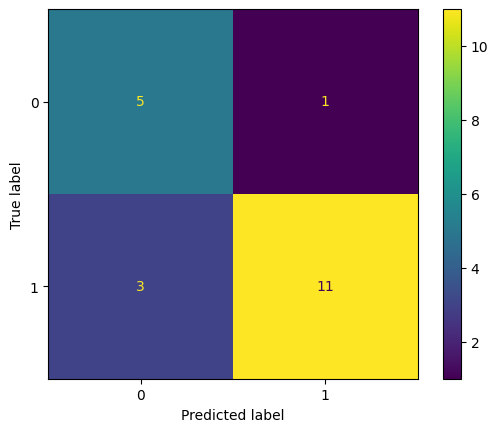

In [195]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)
disp =  ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [196]:
metrics.accuracy_score(y_test, y_pred)

0.8

Display the precision

In [197]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.83333333 0.78571429]


Display the recall

In [198]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.625      0.91666667]


Display the f1-score

In [199]:
f1 = f1_score(y_test, y_pred, average=None)
print("F1-score:", f1)

F1-score: [0.71428571 0.84615385]


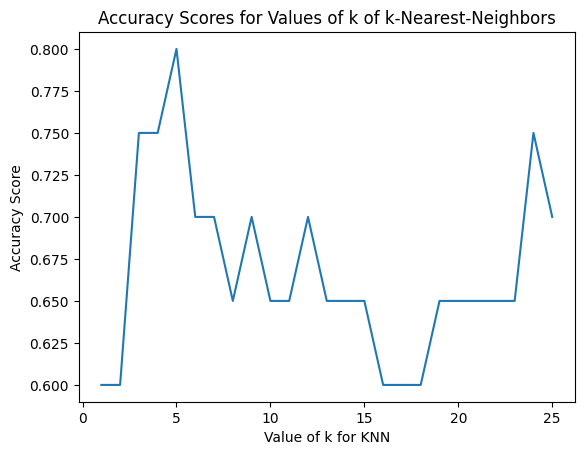

In [200]:

k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [201]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

my_features = [[1, 0, 0, 996]]
my_features_scaled = scaler.transform(my_features)

my_prediction = knn.predict(my_features_scaled)
personality = 'Extrovert' if my_prediction[0] == 1 else 'Introvert'

print(f"\nPrediction for Profile 1: {personality}")


Prediction for Profile 1: Introvert
